<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [4]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [5]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [7]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [9]:
age_categories = [age_category(age) for age in data.Age]

In [10]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [11]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [13]:
# Ваш код здесь, ответ Г
data[data['Sex'] == 'female'].shape , data[data['Sex'] == 'male'].shape #просто посмотрел количество мужчин и жещин

((314, 12), (577, 12))

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [14]:
# Ваш код здесь, ответ Б

data[(data['Sex'] == 'male') & 
   (data['Pclass'] == 2)].shape #тут просто посмтрел сколько по условию "второй класс" - мужчины.

(108, 12)

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [66]:
# Ваш код здесь, ответ А
data['Fare'].describe() # просто взял эти данные

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [21]:
# Ваш код здесь, ответ Б
data[(data['Age'] > 60.0) & 
   (data['Survived'] == 0)].shape # как и в задании 2, просто посмотрел результат отбора по 2 условиям,делить не стал ответ видно.

(17, 12)

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [18]:
# Ваш код здесь, ответ: Г
data[(data['Sex'] == 'male') & 
   (data['Survived'] == 1)].shape #тут проверил количество выживших мужчин и выживших женщин по оличеству соотвествющих строк (109 rows)

(109, 12)

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [224]:
# Ваш код здесь
def name_category(Name):
    if 'John' in Name:
        return 1
    elif 'Thomas' in Name:
        return 2
    elif 'William' in Name:
        return 3
    elif 'Charles' in Name:
        return 4
name_category('Thomas') # попытка номер раз =) ответ: William

2

In [23]:
np.concatenate(data['Name'].apply(lambda s: s.strip().split()).values)

array(['Braund,', 'Mr.', 'Owen', ..., 'Dooley,', 'Mr.', 'Patrick'],
      dtype='<U23')

In [24]:
all_names = set(np.concatenate(data['Name'].apply(lambda s: s.strip().split()).values)) #  в итоге все слова запихал в один set

In [26]:
all_names = (np.concatenate(data['Name'].apply(lambda s: s.strip().split()).values))#из второй лекции взял этот метод.

In [28]:
pd.Series(list(all_names)).value_counts() # William самое популярное

Mr.             517
Miss.           182
Mrs.            125
William          62
John             44
Master.          40
Henry            33
James            24
Charles          23
George           22
Thomas           21
Edward           18
Joseph           16
Frederick        15
Johan            15
Arthur           13
Mary             13
Richard          13
Samuel           13
Alfred           12
Anna             11
Jr               10
Peter             9
Elizabeth         9
Alexander         9
Ernest            9
Andersson,        9
Karl              9
Robert            9
H                 8
               ... 
Wizosky)          1
Dimic,            1
(Alfrida          1
Silven,           1
Hulda             1
Clarke)           1
Fiske             1
Francesco         1
Philip            1
Yousif,           1
Achille           1
Mitto             1
Finck)            1
Rood,             1
Branko            1
Sutehall,         1
Plotcharsky,      1
Ilmari            1
Lahtinen,         1


In [17]:
data['Name'].apply(lambda Name: '1' if 'John' else '0').shape # и вот так пытался

(891,)

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

In [153]:
# Ваш код здесь
data[data['Survived'] == 1].describe()# тут прросто посмотрел на описание признака. Ответ: А

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027614CD70B8>,
      dtype=object)

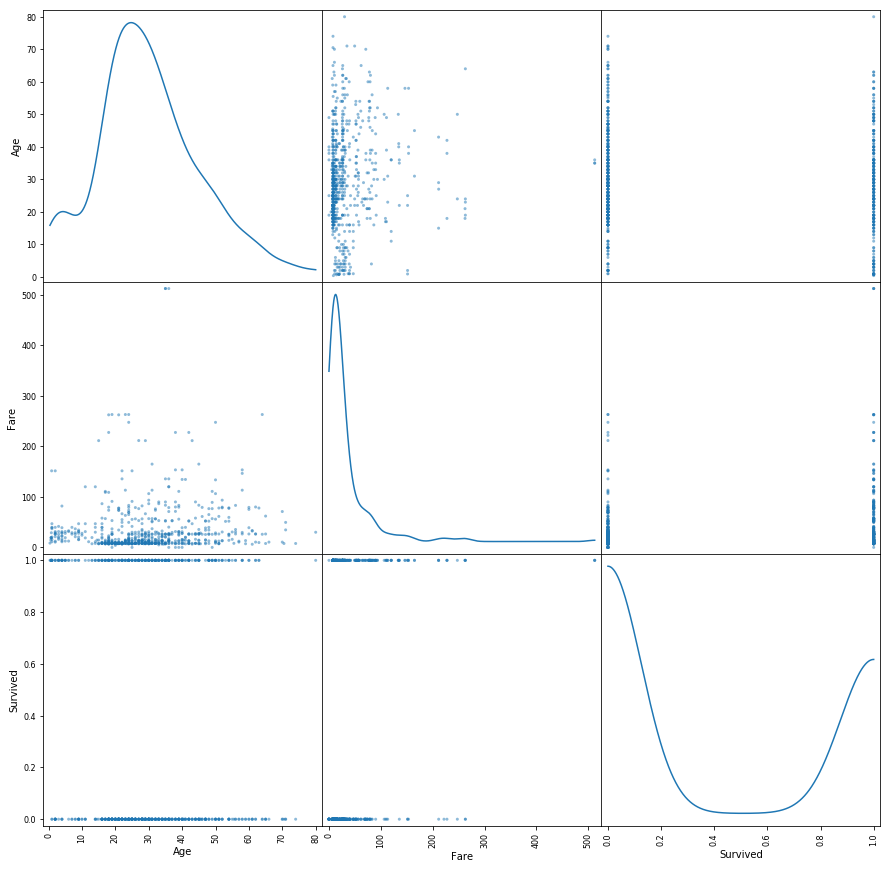

In [151]:
pd.scatter_matrix(data[['Age', 'Fare', 'Survived']], 
                  figsize=(15, 15), diagonal='kde') # тут просто составил графики 

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [168]:
# Ваш код здесь
data[(data['Pclass'] == 1) & 
   (data['Sex'] == 'female')].describe() # просто по очереди проверял условия. ответ: А,В

,Survived,Pclass,Age,SibSp,Parch,Fare
count,94.000000,94.0,85.000000,94.000000,94.000000,94.000000
mean,0.968085,1.0,34.611765,0.553191,0.457447,106.125798
std,0.176716,0.0,13.612052,0.665865,0.728305,74.259988
min,0.000000,1.0,2.000000,0.000000,0.000000,25.929200
25%,1.000000,1.0,23.000000,0.000000,0.000000,57.244800
50%,1.000000,1.0,35.000000,0.000000,0.000000,82.664550
75%,1.000000,1.0,44.000000,1.000000,1.000000,134.500000
max,1.000000,1.0,63.000000,3.000000,2.000000,512.329200


In [131]:
data[data['Pclass'] == 3]['Age'].mean()

25.14061971830986

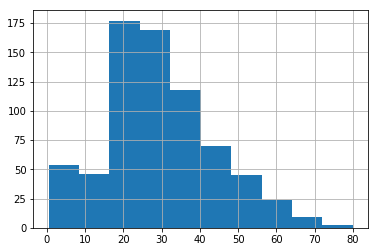

In [154]:
data['Age'].hist()

In [165]:
c = data.groupby('Age').sum()
c = c.sort_values(['Fare'], ascending=False)
c.head(1)

,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,
35.0,11,33,5,1,1607.625


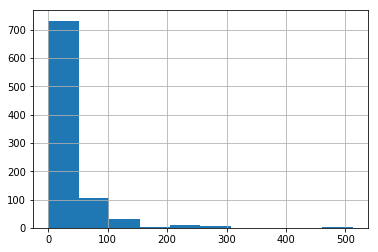

In [166]:
data['Fare'].hist()

In [ ]:
(['quest3'] == 2).dropna().sum() / poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]